# Intro till Pandas
- Series oject1
- Dataframe object 

In [4]:
import pandas as pd
data = dict(AI = 25, Net = 30, App = 27, Java = 23)
series = pd.Series(data = data)
series

AI      25
Net     30
App     27
Java    23
dtype: int64

In [7]:
data2 = dict(AI = 25, Net = 30.0, App = 27, Java = 23)
pd.Series(data2)

AI      25.0
Net     30.0
App     27.0
Java    23.0
dtype: float64

In [9]:
# extract values
print(f"Series [0]: {series[0]}")
print(f"Series [-1]: {series[-1]}")
# extract keys
print(f"Series.key: {series.keys()}")
print(f"Series.key[-2]: {series.keys()[-2]}")

Series [0]: 25
Series [-1]: 23
Series.key: Index(['AI', 'Net', 'App', 'Java'], dtype='object')
Series.key[-2]: App


# DataFrame

In [10]:
df = pd.DataFrame(series)
#print(df)
df

,0
AI,25
Net,30
App,27
Java,23


In [14]:
df = pd.DataFrame(series, columns = ("Number students",))
df

,Number students
AI,25
Net,30
App,27
Java,23


In [15]:
languages = pd.Series(dict(AI = "Python", Net = "C#", App = "Kotlin", Java = "JAVA"))
df = pd.DataFrame({"Students" : series, "Language" : languages})
df

,Students,Language
AI,25,Python
Net,30,C#
App,27,Kotlin
Java,23,JAVA


In [16]:
df.index #Komma åt index

Index(['AI', 'Net', 'App', 'Java'], dtype='object')

# Data selection

In [17]:
df.Students # gets a series with attribute approach

AI      25
Net     30
App     27
Java    23
Name: Students, dtype: int64

In [18]:
df["Students"] # gets a series with dictionary_keys approach

AI      25
Net     30
App     27
Java    23
Name: Students, dtype: int64

In [19]:
# multiple columns
df[["Language", "Students"]]

,Language,Students
AI,Python,25
Net,C#,30
App,Kotlin,27
Java,JAVA,23


In [24]:
# wants to get all rows > 24 students
print(df["Students"] > 24) # __gt__()
df["Students"] > 24
large_groups = df[df["Students"] > 24] # picked out all rows that are True
large_groups

AI       True
Net      True
App      True
Java    False
Name: Students, dtype: bool


,Students,Language
AI,25,Python
Net,30,C#
App,27,Kotlin


In [ ]:
large_groups_index

AttributeError: module 'matplotlib' has no attribute 'title'

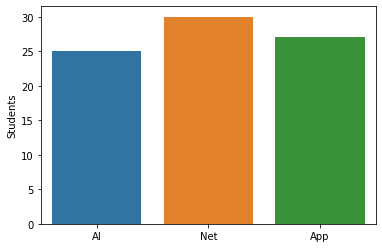

In [31]:
import seaborn as sns
import matplotlib as plt
sns.barplot(data = large_groups, x = large_groups.index, y = "Students")
plt.title("Antal studenter i olika program") # can also use seaborns methods for this

In [ ]:
import pandas as pd
import seaborn as sns
calories = pd.read_excel()
calories.head(3)

In [ ]:
calories.iloc[3:9]

## Data cleaning
- convert String to int
- change column names
- separate liquide and solids

In [ ]:
calories = calories.rename(dict(Cals-per100grams = "calories", per100grams = "per100"), axis = "columns")
calories.tail()

In [ ]:
calories ["Calories"] = calories["Calories"].str[:-3].astype(int)
calories.head()


In [ ]:
calories ["per100"].value_counts()

In [ ]:
solids = calories[calories["per100"] == "100g"]
liquids = calories[calories["per100"] == "100ml"]
liquids 

# Find top 5 categories with highest calories

In [ ]:
solids_top5 = solids.sort_values(by = "Calories", ascending=False)
solids_top5

In [ ]:
liquids_top5 = liquids.sort_values(by = "Calories", ascending=False).head()
liquids_top5

In [ ]:
fig, ax = plt.subplots(1,2, dpi= 100, fidsize =(12, 4))
import matplotlib as plt
sns.barplot(solids_top5, x= "FoodItem", y= "Calories", ax = ax[0])
sns.barplot(solids_top5, x= "FoodItem", y= "Calories", ax = ax[1])